In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
root_dir = r"/Users/khantnyarkoko/Desktop/PML-0006-Khant-Nyar-Ko-Ko/6_deep_learning/CNN/cats_and_dogs_filtered"

In [6]:
BATCH_SIZE  = 32
EPOCHS = 10
input_img_size = (128,128)
input_shape = (128,128,3)

In [7]:
# Data Augmentation
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_ds = tf_generator.flow_from_directory(
    root_dir+"/test",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode= 'categorical'
)

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(2, activation='softmax')
    
])

In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    13,779,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,868,674 (52.90 MB)

 Trainable params: 13,868,674 (52.90 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.5209 - loss: 0.7537 - val_accuracy: 0.5887 - val_loss: 0.6626
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.5773 - loss: 0.6736 - val_accuracy: 0.5403 - val_loss: 0.6908
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 343ms/step - accuracy: 0.4871 - loss: 0.6945 - val_accuracy: 0.5403 - val_loss: 0.6896
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 333ms/step - accuracy: 0.5034 - loss: 0.6940 - val_accuracy: 0.5161 - val_loss: 0.6893
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.5464 - loss: 0.6900 - val_accuracy: 0.5161 - val_loss: 0.6896
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 344ms/step - accuracy: 0.5145 - loss: 0.6911 - val_accuracy: 0.5121 - val_loss: 0.6820
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.5714 - loss: 0.6875 - val_accuracy: 0.4597 - val_loss: 0.6954
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 374ms/step - accuracy: 0.5093 - loss: 0.6931 - val_accu

In [17]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4513 - loss: 0.6939
Validation Loss: 0.6937
Validation Accuracy: 0.4597


In [18]:
BATCH_SIZE
input_shape

(128, 128, 3)

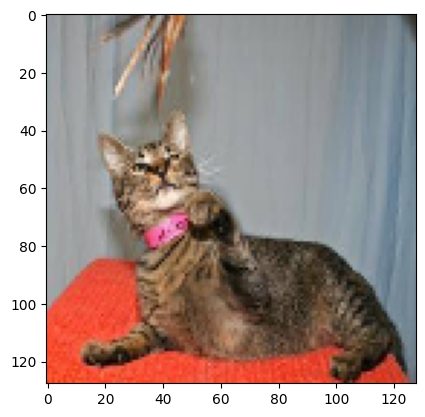

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/Users/khantnyarkoko/Desktop/PML-0006-Khant-Nyar-Ko-Ko/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2383.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [32]:
class_names = list(train_ds.class_indices.keys())

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [33]:
class_names

['cats', 'dogs']

In [34]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


np.float32(0.4928224)

In [35]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: cats with confidence 0.49


### Model Saving

In [37]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML014


In [38]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [40]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = list(train_ds.class_indices.keys())

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
